**Thành viên nhóm:**

1. Nguyễn Trúc Linh - K194141727
2. Huỳnh Mỹ Nga - K194141734
3. Đỗ Thị Lan Phương - K194141741
4. Nguyễn Thụy Hồng Thanh - K194141747
5. Nguyễn Thị Hải Yến - K194141756

**Import libraries** 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

**Import dataset** 

In [ ]:
data = pd.read_csv("data.csv")
data

,Unnamed: 0,Identifier,Company Name,Country of Exchange,Exchange Name,TRBC Economic Sector Name,Total Assets,ROA,Total Current Assets,Total Debt,...,Shares Held By Strategic Investors,Free Cash Flow,Total Revenue,"Accounts Receivable - Trade, Net",Accounts Payable,Total Common Shares Outstanding,TRBC Economic Sector Name.1,TRBC Business Sector Name,Price close,EBIT
0,1.0,CHP.HM,Central Hydropower JSC,Vietnam,HOCHIMINH STOCK EXCHANGE,Utilities,"3,272,703,458,540.00",7.10%,"395,359,537,730.00","1,261,980,213,570.00",...,"101,679,422.00","223,552,740,190.00","787,447,457,860.00","296,194,105,790.00","32,427,758,850.00","146,912,670.00",Utilities,Utilities,"21,432.43","420,262,903,120.00"
1,2.0,POM.HM,Pomina Steel Corp,Vietnam,HOCHIMINH STOCK EXCHANGE,Basic Materials,"12,684,899,592,210.00",1.70%,"7,856,385,602,440.00","6,513,490,523,550.00",...,"172,835,626.00","482,081,130,330.00","13,999,252,169,230.00","1,407,947,782,650.00","1,336,917,357,040.00","278,543,600.00",Basic Materials,Mineral Resources,"14,650.00","349,267,268,710.00"
2,3.0,V21.HN,Vinaconex 21 JSC,Vietnam,HANOI STOCK EXCHANGE,Industrials,"335,579,886,720.00",1.00%,"242,841,896,580.00","40,435,660,670.00",...,"2,549,492.00","4,991,456,450.00","125,499,975,940.00","64,096,912,220.00","52,328,994,960.00","11,999,790.00",Industrials,Industrial & Commercial Services,"13,900.00","6,638,465,080.00"
3,4.0,LIG.HN,Licogi 13 JSC,Vietnam,HANOI STOCK EXCHANGE,Industrials,"5,192,754,538,200.00",0.90%,"3,480,836,199,480.00","1,469,638,274,980.00",...,"29,453,147.00","-127,186,202,530.00","2,439,778,222,620.00","989,997,938,420.00","972,735,913,900.00","64,034,120.00",Industrials,Industrial & Commercial Services,"19,400.00","146,406,628,680.00"
4,5.0,MCC.HN,High Grade Brick Tile Corp,Vietnam,HANOI STOCK EXCHANGE,Basic Materials,"92,957,144,460.00",2.40%,"26,202,345,950.00","4,000,000,000.00",...,"3,875,828.00","-2,091,286,090.00","40,953,605,310.00","6,293,668,100.00","10,475,412,840.00","4,986,120.00",Basic Materials,Mineral Resources,"10,923.34","2,817,838,400.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,749.0,PVL.HN,Viet Property Investment JSC,Vietnam,HANOI STOCK EXCHANGE,Real Estate,"409,402,116,810.00",4.20%,"159,891,057,180.00",0,...,"1,319,500.00","16,748,445,570.00","23,741,669,820.00","-48,606,751,860.00","18,278,082,350.00","50,000,000.00",Real Estate,Real Estate,"16,420.07","12,877,279,590.00"
749,750.0,CCI.HM,CuChi Commercial and Industrial Developing Inv...,Vietnam,HOCHIMINH STOCK EXCHANGE,Energy,"689,162,756,150.00",4.70%,"464,260,074,500.00",0,...,"10,909,860.00","9,173,167,890.00","299,154,973,980.00","6,380,239,040.00","779,799,810.00","17,541,110.00",Energy,Energy - Fossil Fuels,"31,300.00","516,190,696,770.00"
750,751.0,PPP.HN,Phong Phu Pharmaceutical JSC,Vietnam,HANOI STOCK EXCHANGE,Healthcare,"156,030,037,380.00",11.20%,"70,775,497,180.00","2,000,000,000.00",...,"6,004,556.00","15,911,140,290.00","133,289,268,790.00","10,445,970,430.00","16,377,897,930.00","8,799,990.00",Healthcare,Pharmaceuticals & Medical Research,NaN,NaN
751,752.0,IJC.HM,Becamex Infrastructure Development JSC,Vietnam,HOCHIMINH STOCK EXCHANGE,Real Estate,"6,808,654,305,270.00",9.10%,"4,808,121,360,240.00","1,123,168,059,610.00",...,"108,033,503.00","300,310,809,480.00","2,601,723,414,610.00","464,423,774,340.00","815,836,758,810.00","217,097,320.00",Real Estate,Real Estate,NaN,NaN


**Data preprocessing**

In [ ]:
data.columns

Index(['Unnamed: 0', 'Identifier', 'Company Name', 'Country of Exchange',
       'Exchange Name', 'TRBC Economic Sector Name', 'Total Assets', 'ROA ',
       'Total Current Assets', 'Total Debt', 'Total Equity',
       'Property/Plant/Equipment, Total - Net',
       'Cash from Operating Activities', 'Cash from Financing Activities',
       'Cash from Investing Activities', 'Price To Book Value Per Share ',
       'Depreciation', 'Total Current Liabilities', 'Retained Earnings ',
       'Cash and Short Term Investments', 'Cash Dividend Paid',
       'Company Market Cap', 'Shares Held By Strategic Investors',
       'Free Cash Flow', 'Total Revenue', 'Accounts Receivable - Trade, Net',
       'Accounts Payable', 'Total Common Shares Outstanding',
       'TRBC Economic Sector Name.1', 'TRBC Business Sector Name',
       'Price close', 'EBIT'],
      dtype='object')

In [ ]:
data['TRBC Economic Sector Name'].value_counts()

Industrials               200
Basic Materials           134
Consumer Cyclicals         91
Real Estate                81
Consumer Non-Cyclicals     70
Financials                 56
Energy                     44
Utilities                  36
Healthcare                 21
Technology                 19
Name: TRBC Economic Sector Name, dtype: int64

In [ ]:
list_industry = ['Industrials', 'Basic Materials', 'Consumer Cyclicals', 'Consumer Non-Cyclicals', 'Utilities', 'Technology', 'Energy']
data = data[data['TRBC Economic Sector Name'].isin(list_industry)]

In [ ]:
columns = ['Identifier','Total Assets', 'Total Current Assets', 'Total Current Liabilities', 'Retained Earnings ', 'Total Revenue', 'Total Common Shares Outstanding','Price close','EBIT']
data = data[columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Identifier                       594 non-null    object
 1   Total Assets                     590 non-null    object
 2   Total Current Assets             590 non-null    object
 3   Total Current Liabilities        590 non-null    object
 4   Retained Earnings                589 non-null    object
 5   Total Revenue                    590 non-null    object
 6   Total Common Shares Outstanding  584 non-null    object
 7   Price close                      589 non-null    object
 8   EBIT                             588 non-null    object
dtypes: object(9)
memory usage: 46.4+ KB


In [ ]:
float_col = ['Total Assets', 'Total Current Assets', 'Total Current Liabilities', 'Retained Earnings ', 'Total Revenue', 'Total Common Shares Outstanding','Price close','EBIT']

In [ ]:
def convert(s):
    s = str(s).replace(',','')
    return s

In [ ]:
for col in float_col:
    data[col] = data[col].apply(convert).astype('float')

In [ ]:
#fill na 
col = ['Total Assets', 'Total Current Assets', 'Total Current Liabilities', 'Retained Earnings ', 'Total Revenue']
data[col] = data[col].fillna(data[col].mean())
data['Total Common Shares Outstanding'] = data['Total Common Shares Outstanding'].median()

In [ ]:
#Calculate MV of equity & total liabilities
data['MV of equity'] = data['Price close']*data['Total Common Shares Outstanding']


In [ ]:
#Calculate categorical features
data['X1'] = (data['Total Current Assets'] - data['Total Current Liabilities'])/data['Total Assets']
data['X2'] = data['Retained Earnings ']/data['Total Assets']
data['X3'] = data['EBIT']/data['Total Assets']
data['X4'] = data['MV of equity']/data['Total Current Liabilities']
data['X5'] = data['Total Revenue']/data['Total Assets']

In [ ]:
maincol = ['Identifier', 'X1', 'X2', 'X3','X4','X5']
maindata = data[maincol]
maindata =maindata.dropna()

In [ ]:
#Calculate Z-score based on the model of Edward I.Altman
maindata['z-score'] = 1.21*maindata['X1'] + 1.4*maindata['X2'] + 3.3*maindata['X3'] + 0.6*maindata['X4'] + 0.999*maindata['X5']
maindata

,Identifier,X1,X2,X3,X4,X5,z-score
0,CHP.HM,0.021399,0.093013,0.128415,1.620709,0.240611,1.792676
1,POM.HM,0.000942,0.051860,0.027534,0.045944,1.103616,1.294685
2,V21.HN,0.160904,0.000772,0.019782,1.810752,0.373979,1.721112
3,LIG.HN,0.039286,0.010015,0.028194,0.145646,0.469843,0.711359
4,MCC.HN,0.053911,0.035097,0.030313,12.681113,0.440564,8.263194
...,...,...,...,...,...,...,...
741,QHD.HN,0.410623,0.245742,11.076907,19.240053,1.983462,50.920196
742,L35.HN,0.071936,-0.077473,1.044251,7.366739,0.397284,8.241539
745,BTT.HM,0.158912,0.149083,0.164899,25.877147,0.223002,16.694234
747,DAG.HM,0.194366,0.007615,0.008052,0.600314,0.962447,1.594088


In [ ]:
#Create dependent variable
maindata.loc[maindata['z-score'] >= 2.99, 'Status'] = 'Safe'
maindata.loc[(maindata['z-score'] < 2.99) & (maindata['z-score'] > 1.81), 'Status'] = 'Gray'
maindata.loc[maindata['z-score'] < 1.81, 'Status'] = 'Distress'

Safe = 0 
Gray = 1 
Distress  = 2 

In [ ]:
encoder_status = LabelEncoder() #creating label encoder object
maindata["Status"] = encoder_status.fit_transform(maindata["Status"]).copy() #converting to numberical for Status attribute

In [ ]:
maindata

,Identifier,X1,X2,X3,X4,X5,z-score,Status
0,CHP.HM,0.021399,0.093013,0.128415,1.620709,0.240611,1.792676,0
1,POM.HM,0.000942,0.051860,0.027534,0.045944,1.103616,1.294685,0
2,V21.HN,0.160904,0.000772,0.019782,1.810752,0.373979,1.721112,0
3,LIG.HN,0.039286,0.010015,0.028194,0.145646,0.469843,0.711359,0
4,MCC.HN,0.053911,0.035097,0.030313,12.681113,0.440564,8.263194,2
...,...,...,...,...,...,...,...,...
741,QHD.HN,0.410623,0.245742,11.076907,19.240053,1.983462,50.920196,2
742,L35.HN,0.071936,-0.077473,1.044251,7.366739,0.397284,8.241539,2
745,BTT.HM,0.158912,0.149083,0.164899,25.877147,0.223002,16.694234,2
747,DAG.HM,0.194366,0.007615,0.008052,0.600314,0.962447,1.594088,0


***Correlation matrix***

In [ ]:
target = ['Status']
categorical_features = ['X1','X2','X3','X4','X5']

In [ ]:
matrix = maindata.corr()

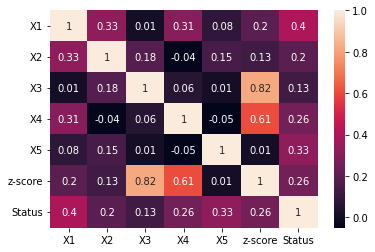

In [ ]:
sns.heatmap(matrix.round(2), annot=True)
plt.show()

***Descriptive statistics***


In [ ]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 749
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Identifier  585 non-null    object 
 1   X1          585 non-null    float64
 2   X2          585 non-null    float64
 3   X3          585 non-null    float64
 4   X4          585 non-null    float64
 5   X5          585 non-null    float64
 6   z-score     585 non-null    float64
 7   Status      585 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 41.1+ KB


In [ ]:
maindata[target].value_counts()

Status
2         289
0         166
1         130
dtype: int64

In [ ]:
maindata[categorical_features].describe()

,X1,X2,X3,X4,X5
count,585.000000,585.000000,585.000000,585.000000,585.000000
mean,0.228588,0.069486,0.198310,13.959161,1.151623
std,0.235549,0.145563,11.263975,44.546945,1.262169
min,-0.472759,-1.075446,-228.729621,0.002847,-0.047302
25%,0.079274,0.025011,0.006329,0.577262,0.402674
50%,0.192123,0.063524,0.039448,1.810752,0.832046
75%,0.357034,0.132470,0.147885,7.368995,1.442477
max,0.957079,0.722730,69.917729,610.025260,10.910511


***Check missing values***

In [ ]:
maindata.isnull().sum()

Identifier    0
X1            0
X2            0
X3            0
X4            0
X5            0
z-score       0
Status        0
dtype: int64

***Visualization***

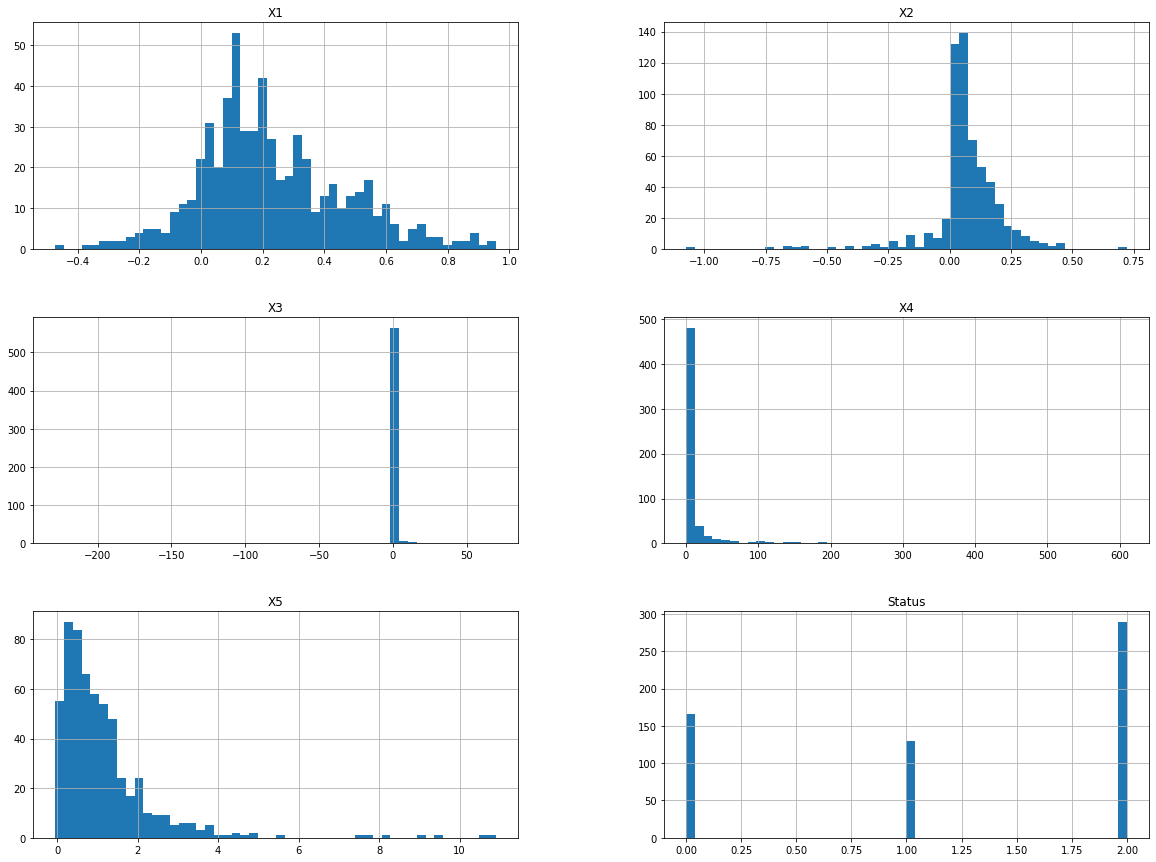

In [ ]:
%matplotlib inline
#Creating histogram for numerical attributes
maindata.drop(columns=['Identifier','z-score']).hist(bins=50, figsize=(20,15))
plt.show()

***Build model***

In [ ]:
# Import libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [ ]:
X = maindata[categorical_features].values
y = maindata[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 0]
 [2 2]
 [2 1]
 [2 2]
 [0 0]
 [1 0]
 [2 2]
 [2 2]
 [2 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [0 0]
 [2 2]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]

In [ ]:
#Predection
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[39  4  0]
 [ 6 25  7]
 [ 1  9 85]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.66      0.66      0.66        38
           2       0.92      0.89      0.91        95

    accuracy                           0.85       176
   macro avg       0.81      0.82      0.81       176
weighted avg       0.85      0.85      0.85       176

Decision Tree accuracy:  0.8465909090909091


In [ ]:
df_report = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':y_pred.ravel()})
df_report

,Ground Truth,Prediction
0,2,2
1,2,2
2,2,2
3,0,0
4,2,2
...,...,...
171,2,1
172,1,1
173,2,2
174,2,2


In [ ]:
#Feature importance
importance_dt = classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': maindata.columns[1:-2], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
3,X4,0.494423
4,X5,0.272760
2,X3,0.130330
1,X2,0.059037
0,X1,0.043450


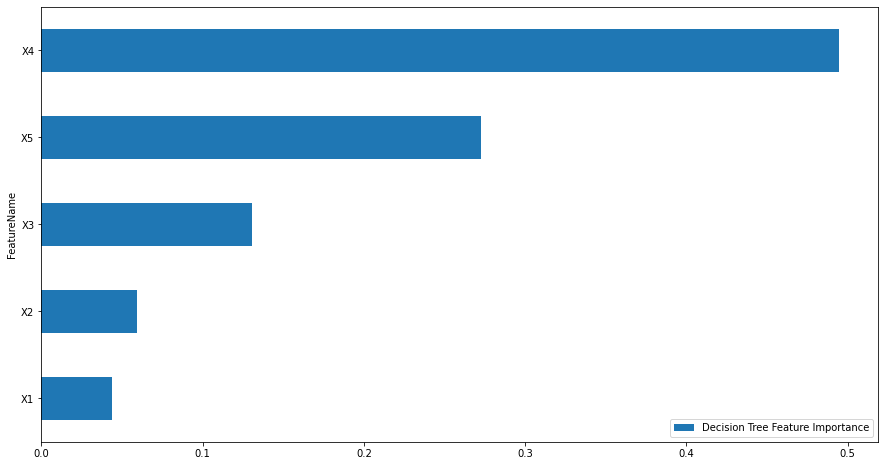

In [ ]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

In [ ]:
#Plot Tree
X_plot_tree = maindata.iloc[:, 1:-2]

In [ ]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

X_0: X1
X_1: X2
X_2: X3
X_3: X4
X_4: X5


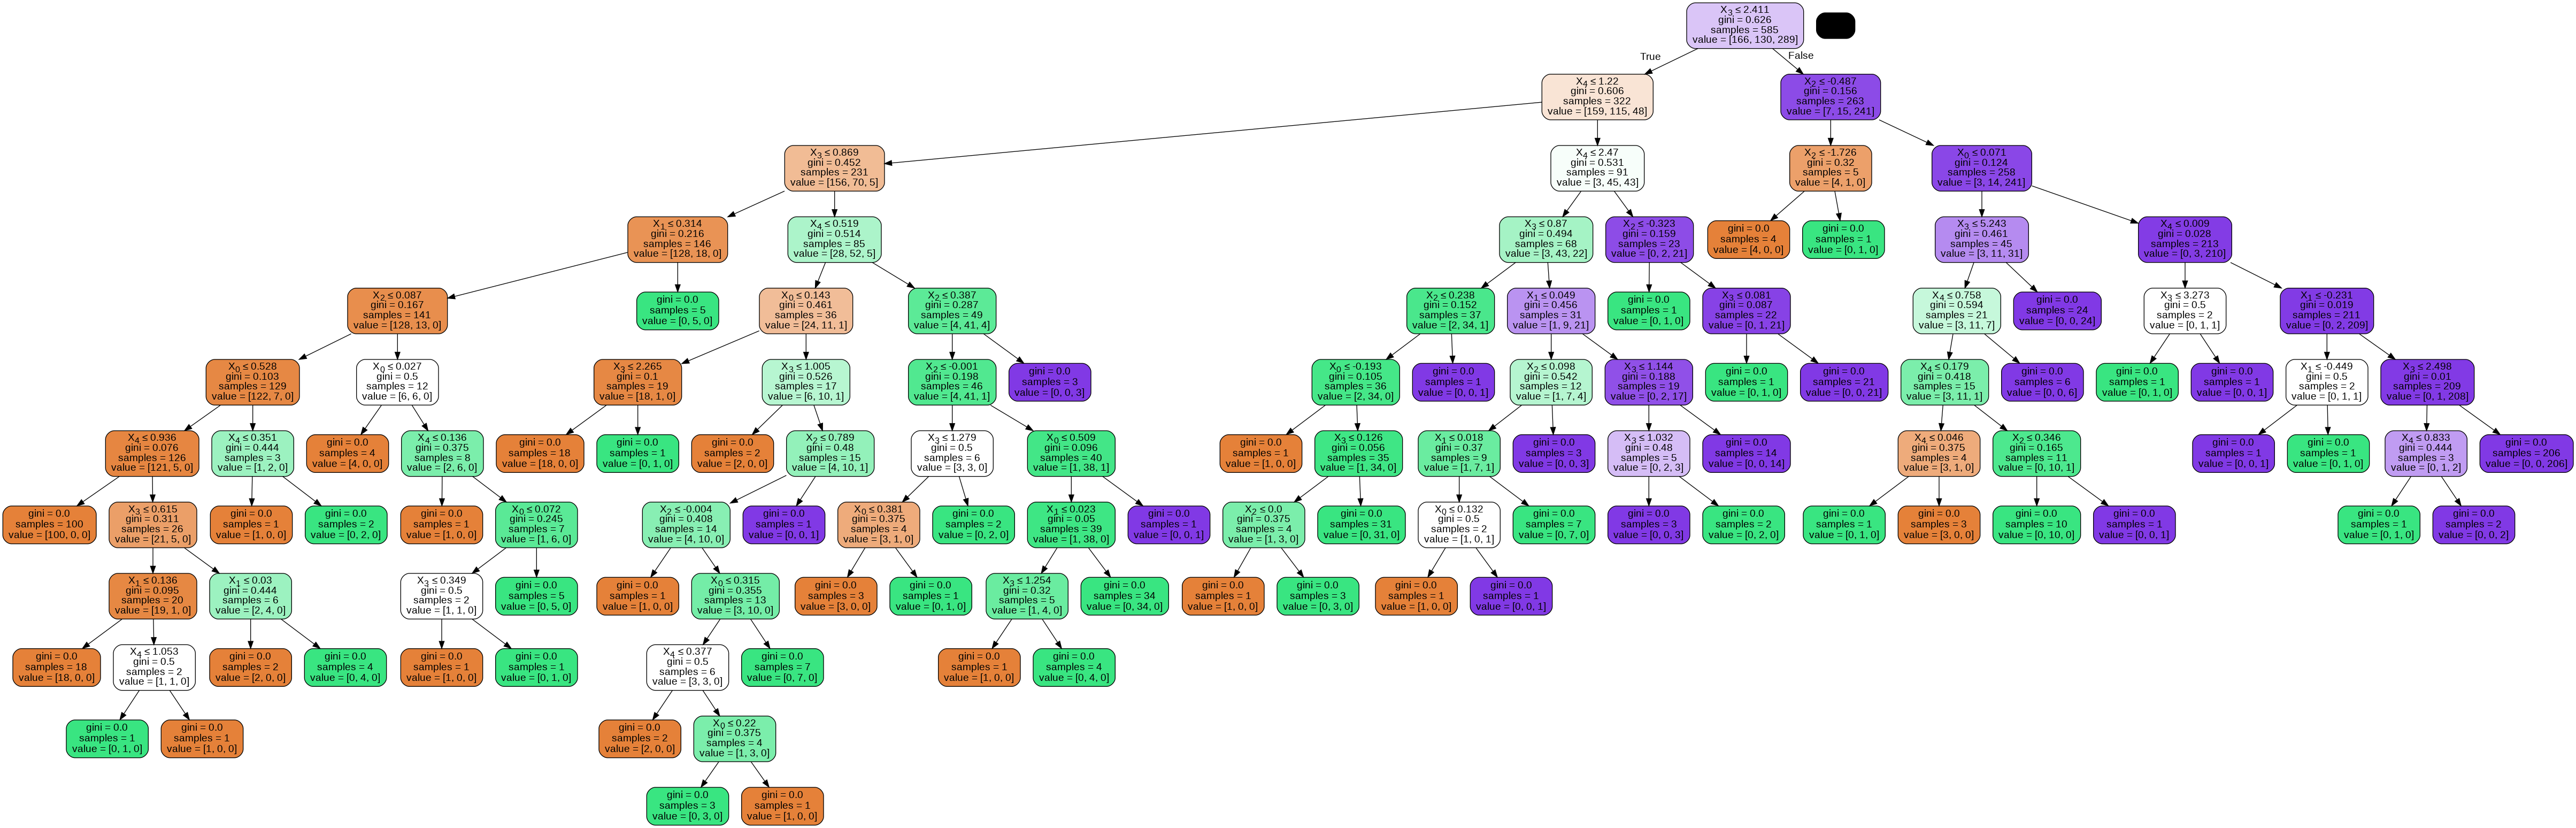

In [ ]:
dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Prediction
y_pred_lr=lr.predict(X_test)